In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests


In [17]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [18]:
c.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [19]:
url = "https://data.colorado.gov/resource/tv8u-hswn.json?$where=age between 20 and 25 and year between 2020 and 2025&county=Boulder&$select=year,age,femalepopulation"
url = url.replace(" ", "%20")
url


'https://data.colorado.gov/resource/tv8u-hswn.json?$where=age%20between%2020%20and%2025%20and%20year%20between%202020%20and%202025&county=Boulder&$select=year,age,femalepopulation'

In [20]:
dem_data_20_25_female = pd.read_json(url)

dem_data_20_25_female.head()


,year,age,femalepopulation
0,2023,21,3804
1,2025,21,3817
2,2025,23,2836
3,2025,24,2393
4,2024,24,2338


In [21]:
# set year as index
dem_data_20_25_female = dem_data_20_25_female.set_index("year")
dem_data_20_25_female.head()


,age,femalepopulation
year,,
2023,21,3804
2025,21,3817
2025,23,2836
2025,24,2393
2024,24,2338


In [22]:
# Pivot the data for stacked plotting
dem_data_20_25_female_pivot = dem_data_20_25_female.pivot_table('femalepopulation',
                                                                ['year'], "age")
dem_data_20_25_female_pivot.head()


age,20,21,22,23,24,25
year,,,,,,
2020,3856,3675,3316,2632,2288,2273
2021,3910,3706,3276,2743,2249,2299
2022,3964,3747,3296,2693,2352,2253
2023,3930,3804,3340,2716,2306,2360
2024,3968,3778,3405,2769,2338,2325


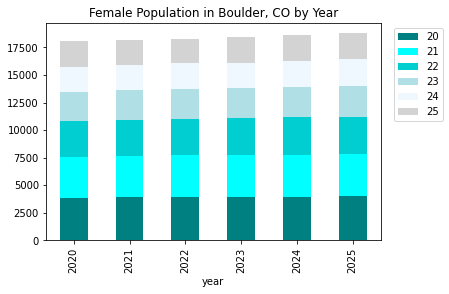

In [23]:
# Plot the data
my_colors = ["teal",
             "aqua",
             "darkturquoise",
             "powderblue",
             "aliceblue", 
             "lightgrey"]

f, ax = plt.subplots()
dem_data_20_25_female_pivot.plot.bar(stacked=True,
                                     color=my_colors,
                                     ax=ax).legend(loc='upper right',
                                                   bbox_to_anchor=(1.2, 1.0))
ax.set(title="Female Population in Boulder, CO by Year")

plt.show()


https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/spatial-data-using-apis/

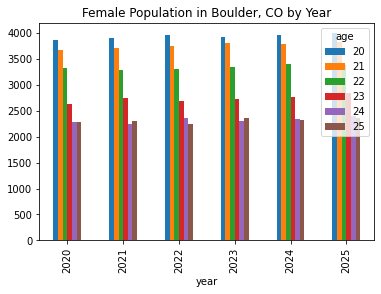

In [26]:
# THIS will only work if you have plotly installed
# uncomment code to run - plotly is not  yet in our ea-environment but will be added
# conda install -c conda-forge plotly
# pd.options.plotting.backend = "plotly"

# # Plot the data
my_colors = ["teal",
              "aqua",
              "darkturquoise",
              "powderblue",
              "aliceblue",
              "lightgrey"]

dem_data_20_25_female_pivot.plot.bar(title="Female Population in Boulder, CO by Year")


In [27]:
import json
import pandas as pd


In [28]:
# Create and populate the dictionary
dict = {}
dict["name"] = "Chaya"
dict["age"] = 12
dict["city"] = "Boulder"
dict["type"] = "Canine"

dict


{'age': 12, 'city': 'Boulder', 'name': 'Chaya', 'type': 'Canine'}

In [29]:
json_example = json.dumps(dict, ensure_ascii=False)

json_example


'{"name": "Chaya", "age": 12, "city": "Boulder", "type": "Canine"}'

In [30]:
type(json_example)


str

In [31]:
json_sample =  '{ "name":"Chaya", "age":12, "city":"Boulder", "type":"Canine" }'

type(json_sample)


str

In [32]:
# Load JSON into dictionary
data_sample = json.loads(json_sample)
data_sample


{'age': 12, 'city': 'Boulder', 'name': 'Chaya', 'type': 'Canine'}

In [33]:
type(data_sample)


dict

In [34]:
data_sample["name"]


'Chaya'

In [35]:
data_sample["city"]


'Boulder'

In [36]:
df = pd.DataFrame.from_dict(data_sample, orient='index')
df


,0
name,Chaya
age,12
city,Boulder
type,Canine


In [37]:
sample_json = df.to_json(orient='split')

type(sample_json)


str

In [39]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 28.8 MB/s 
     |████████████████████████████████| 16.7 MB 19.8 MB/s 


In [40]:
import requests
import folium
import urllib
from pandas.io.json import json_normalize
import pandas as pd
import folium
from geopandas import GeoDataFrame
from shapely.geometry import Point



In [41]:
# Get URL
water_base_url = "https://data.colorado.gov/resource/j5pc-4t32.json?"
water_full_url = water_base_url + "station_status=Active" + "&county=BOULDER"


In [42]:
water_full_url


'https://data.colorado.gov/resource/j5pc-4t32.json?station_status=Active&county=BOULDER'

In [43]:
data = requests.get(water_full_url)


In [47]:
type(data.json())


list

In [48]:
data.json()[:2]


[{'amount': '302.00',
  'county': 'BOULDER',
  'data_source': 'Co. Division of Water Resources',
  'date_time': '2022-06-12T19:45:00.000',
  'div': '1',
  'dwr_abbrev': 'NSVBBRCO',
  'http_linkage': {'url': 'https://dwr.state.co.us/Tools/Stations/NSVBBRCO'},
  'location': {'latitude': '40.215665',
   'longitude': '-105.363434',
   'needs_recoding': False},
  'stage': '1.63',
  'station_name': 'NORTH SAINT VRAIN CREEK BELOW BUTTONROCK  (RALPH PRICE) RESERVOIR',
  'station_status': 'Active',
  'station_type': 'Stream',
  'variable': 'DISCHRG',
  'wd': '5'},
 {'amount': '16067.00',
  'county': 'BOULDER',
  'data_source': 'Co. Division of Water Resources',
  'date_time': '2022-06-12T19:45:00.000',
  'div': '1',
  'dwr_abbrev': 'BRKDAMCO',
  'http_linkage': {'url': 'https://dwr.state.co.us/Tools/Stations/BRKDAMCO'},
  'location': {'latitude': '40.219387',
   'longitude': '-105.368966',
   'needs_recoding': False},
  'stage': '6399.41',
  'station_name': 'BUTTONROCK (RALPH PRICE) RESERVOIR',

In [49]:
from pandas.io.json import json_normalize


In [50]:
result = json_normalize(data.json())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [65]:
result.head()


,station_name,div,dwr_abbrev,data_source,amount,station_type,wd,date_time,county,variable,stage,station_status,location.latitude,location.needs_recoding,location.longitude,http_linkage.url,usgs_station_id,flag,geometry
0,NORTH SAINT VRAIN CREEK BELOW BUTTONROCK (RAL...,1,NSVBBRCO,Co. Division of Water Resources,302.00,Stream,5,2022-06-12T19:45:00.000,BOULDER,DISCHRG,1.63,Active,40.215665,False,-105.363434,https://dwr.state.co.us/Tools/Stations/NSVBBRCO,NaN,NaN,POINT (-105.36343 40.21567)
1,BUTTONROCK (RALPH PRICE) RESERVOIR,1,BRKDAMCO,Co. Division of Water Resources,16067.00,Reservoir,5,2022-06-12T19:45:00.000,BOULDER,STORAGE,6399.41,Active,40.219387,False,-105.368966,https://dwr.state.co.us/Tools/Stations/BRKDAMCO,NaN,NaN,POINT (-105.36897 40.21939)
2,LEGGETT-VALMONT RESERVOIR INLET,1,LVRINLCO,Co. Division of Water Resources,0.00,Diversion,6,2022-06-12T20:15:00.000,BOULDER,DISCHRG,NaN,Active,40.020526,False,-105.205895,https://dwr.state.co.us/Tools/Stations/LVRINLCO,NaN,NaN,POINT (-105.20589 40.02053)
3,MIDDLE SAINT VRAIN AT PEACEFUL VALLEY,1,MIDSTECO,Co. Division of Water Resources,260.00,Stream,5,2022-06-12T20:00:00.000,BOULDER,DISCHRG,3.90,Active,40.129806,False,-105.517111,https://dwr.state.co.us/Tools/Stations/MIDSTECO,NaN,NaN,POINT (-105.51711 40.12981)
4,WEBSTER MCCASLIN DITCH,1,WEBDITCO,"Cooperative Program of CDWR, NCWCD & SVLHWCD",6.09,Diversion,5,2022-06-12T19:30:00.000,BOULDER,DISCHRG,1.01,Active,40.193287,False,-105.210434,https://dwr.state.co.us/Tools/Stations/WEBDITCO,NaN,NaN,POINT (-105.21043 40.19329)


In [52]:
type(result)


pandas.core.frame.DataFrame

In [53]:
result.columns


Index(['station_name', 'div', 'dwr_abbrev', 'data_source', 'amount',
       'station_type', 'wd', 'date_time', 'county', 'variable', 'stage',
       'station_status', 'location.latitude', 'location.needs_recoding',
       'location.longitude', 'http_linkage.url', 'usgs_station_id', 'flag'],
      dtype='object')

In [54]:
result['location.latitude'][0]


'40.215665'

In [55]:
result['location.latitude'] = result['location.latitude'].astype(float)


In [56]:
result['location.latitude'][0]


40.215665

In [57]:
result['location.longitude'] = result['location.longitude'].astype(float)


In [58]:
result['location.longitude'][0]


-105.363434

In [59]:
result.shape


(94, 18)

In [61]:
result['location.longitude'].isna().any()


False

In [62]:
result['location.latitude'].isna().any()


False

In [63]:
geometry = [Point(xy) for xy in zip(result['location.longitude'], result['location.latitude'])]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=geometry)


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [67]:
gdf.head(1)


,station_name,div,dwr_abbrev,data_source,amount,station_type,wd,date_time,county,variable,stage,station_status,location.latitude,location.needs_recoding,location.longitude,http_linkage.url,usgs_station_id,flag,geometry
0,NORTH SAINT VRAIN CREEK BELOW BUTTONROCK (RAL...,1,NSVBBRCO,Co. Division of Water Resources,302.00,Stream,5,2022-06-12T19:45:00.000,BOULDER,DISCHRG,1.63,Active,40.215665,False,-105.363434,https://dwr.state.co.us/Tools/Stations/NSVBBRCO,NaN,NaN,POINT (-105.36343 40.21567)


In [66]:
gdf.shape

(94, 19)

In [69]:
result.head(1)

,station_name,div,dwr_abbrev,data_source,amount,station_type,wd,date_time,county,variable,stage,station_status,location.latitude,location.needs_recoding,location.longitude,http_linkage.url,usgs_station_id,flag,geometry
0,NORTH SAINT VRAIN CREEK BELOW BUTTONROCK (RAL...,1,NSVBBRCO,Co. Division of Water Resources,302.00,Stream,5,2022-06-12T19:45:00.000,BOULDER,DISCHRG,1.63,Active,40.215665,False,-105.363434,https://dwr.state.co.us/Tools/Stations/NSVBBRCO,NaN,NaN,POINT (-105.36343 40.21567)


In [70]:
result.shape

(94, 19)

In [71]:
m = folium.Map([40.01, -105.27], zoom_start= 10, tiles='cartodbpositron')
folium.GeoJson(gdf).add_to(m)

m


In [72]:
# Get the latitude and longitude from result as a list
locations = result[['location.latitude', 'location.longitude']]
coords = locations.values.tolist()


In [73]:
from folium.plugins import MarkerCluster

m = folium.Map([40.01, -105.27], zoom_start= 10, tiles='cartodbpositron')

marker_cluster = MarkerCluster().add_to(m)

for point in range(0, len(coords)):
    folium.Marker(location = coords[point], popup= 'Name: ' + result['station_name'][point] + ' ' + 'Precip: ' + str(result['amount'][point])).add_to(marker_cluster)

m
